# Large_Scale_Preprocessing(대용량 이미지 전처리)

## Download Dataset(캐글에서 데이터셋 다운로드받기)

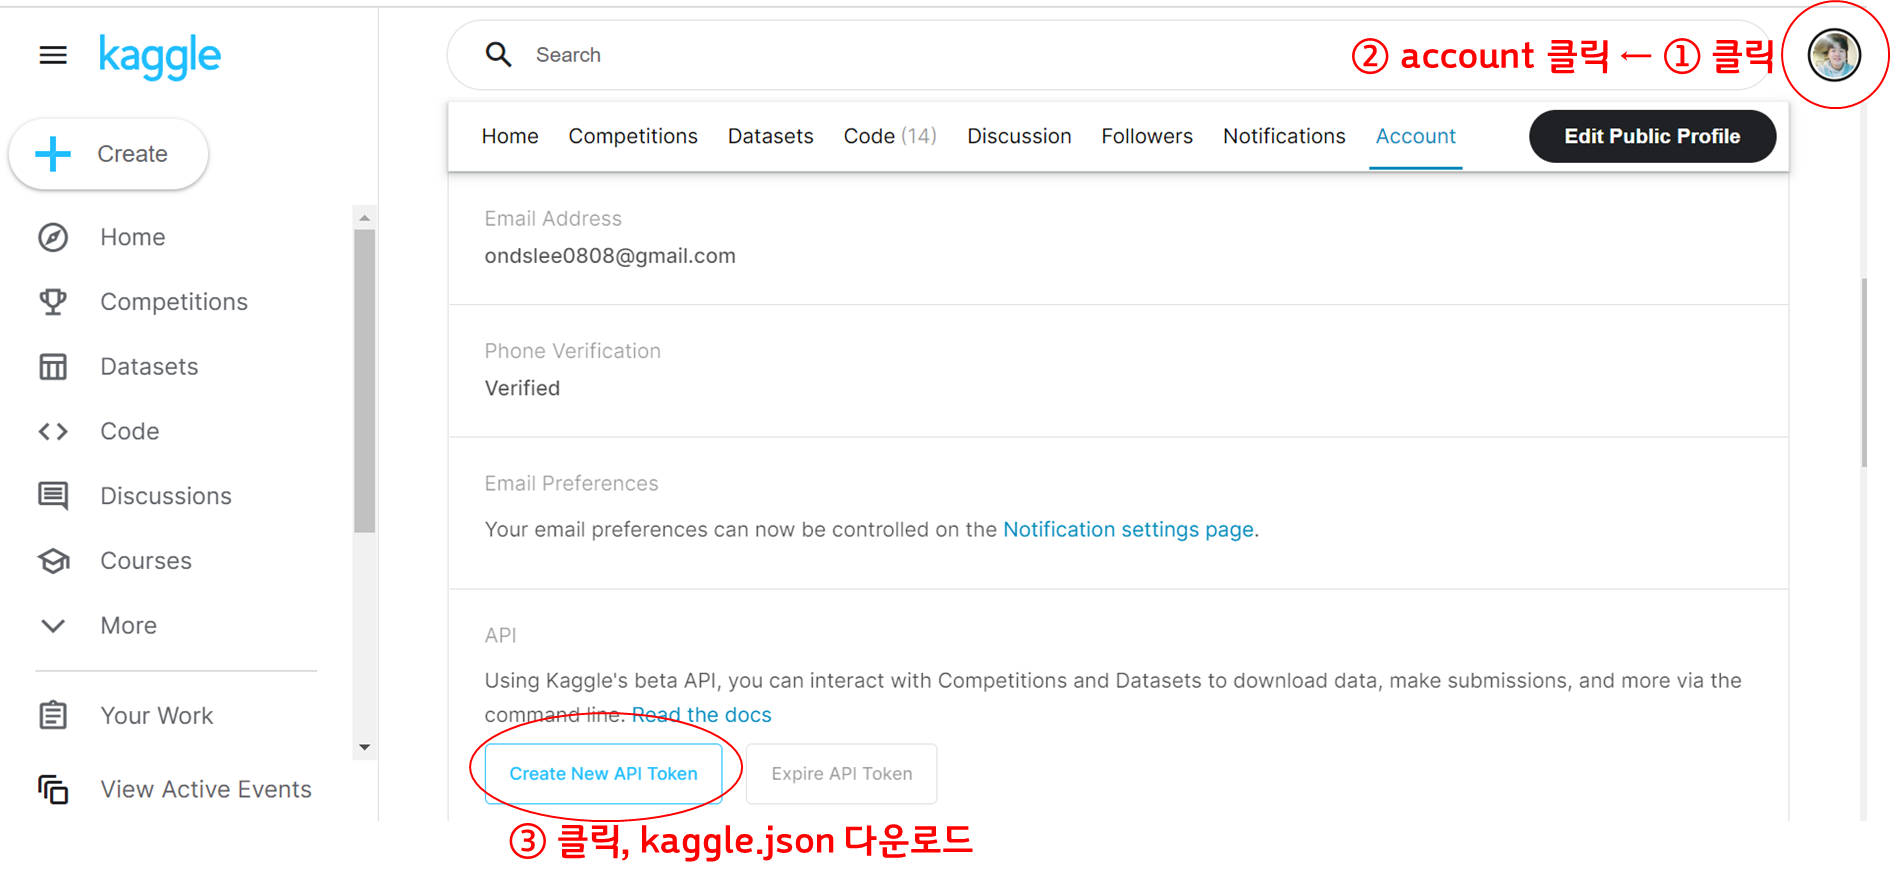

In [ ]:
# 캐글 설치
!pip install -q kaggle

- kaggle.json 파일이 현재 content 경로에 있음
- root/.kaggle 폴더로 이동시켜줘야 함
--------------------------------
- root는 ~로 표시함 
- .kaggle폴더는 없기 때문에 우리가 직접 만들어줘야함

In [ ]:
# .kaggle 폴더 생성
!mkdir -p ~/.kaggle/
# kaggle.josn .kaggle로 복사
!cp kaggle.json ~/.kaggle/
# 해당 폴더 목록 확인(복사 잘 되었는지 확인)
!ls ~/.kaggle

kaggle.json


- root 경로에 .kaggle폴더가 잘 만들어졌는지 확인하고 싶다면 
- root경로의 목록에 .kaggle폴더가 있는지 확인만 하면 됨
-----------
1) root경로로 이동 (cd ~)   
2) root 경로의 목록을 확인 (!ls -a)

In [ ]:
!cd ~/ # 경로 이동 (~:루트경로로 이동)

In [ ]:
!ls -a # 해당 경로 목록 전부(-a: 숨김파일까지) 확인

.  ..  .config	kaggle.json  sample_data


In [ ]:
!ls ~/.kaggle -al # 해당 경로 목록 상세정보까지(-al: 권한정보, 날짜) 확인

total 16
drwxr-xr-x 2 root root 4096 Mar 17 05:06 .
drwx------ 1 root root 4096 Mar 17 05:05 ..
-rw-r--r-- 1 root root   67 Mar 17 05:06 kaggle.json


In [ ]:
# 파일 권한 변경 : 읽기, 쓰기, 실행 (rwx)
!chmod 600 ~/.kaggle/kaggle.json

1) 파일권한 : 읽기, 쓰기, 실행 (rwx)  
2) 대상 : 소유자, 소유그룹, others  
3) 권한 표시 : 2진법을 8진법으로  
- 권한부여는 1, x는 0
- rwx 모두 부여는 111 -> 7
- rwx 모두 미부여는 000 -> 0


In [ ]:
!ls .kaggle -al

ls: cannot access '.kaggle': No such file or directory


In [ ]:
cd /content

/content


In [ ]:
!ls

kaggle.json  sample_data


In [ ]:
!ls -a

.  ..  .config	kaggle.json  sample_data


In [ ]:
!pwd

/content


In [ ]:
#downloading dataset
!kaggle datasets download -d prasunroy/natural-images 

 99% 339M/342M [00:18<00:00, 20.5MB/s]
100% 342M/342M [00:18<00:00, 19.4MB/s]


In [ ]:
!unzip -q natural-images.zip

In [ ]:
import os

import cv2
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

import pickle

from sklearn.model_selection import train_test_split

In [ ]:
folder_path = '/content/natural_images' 
label_names = os.listdir(folder_path) 
label_names

['motorbike', 'cat', 'airplane', 'flower', 'car', 'dog', 'person', 'fruit']

In [ ]:
os.listdir(folder_path + '/airplane')

['airplane_0486.jpg',
 'airplane_0685.jpg',
 'airplane_0577.jpg',
 'airplane_0034.jpg',
 'airplane_0131.jpg',
 'airplane_0516.jpg',
 'airplane_0039.jpg',
 'airplane_0251.jpg',
 'airplane_0268.jpg',
 'airplane_0391.jpg',
 'airplane_0274.jpg',
 'airplane_0699.jpg',
 'airplane_0207.jpg',
 'airplane_0620.jpg',
 'airplane_0239.jpg',
 'airplane_0203.jpg',
 'airplane_0016.jpg',
 'airplane_0694.jpg',
 'airplane_0565.jpg',
 'airplane_0265.jpg',
 'airplane_0673.jpg',
 'airplane_0204.jpg',
 'airplane_0311.jpg',
 'airplane_0024.jpg',
 'airplane_0503.jpg',
 'airplane_0205.jpg',
 'airplane_0647.jpg',
 'airplane_0058.jpg',
 'airplane_0612.jpg',
 'airplane_0173.jpg',
 'airplane_0442.jpg',
 'airplane_0502.jpg',
 'airplane_0468.jpg',
 'airplane_0498.jpg',
 'airplane_0055.jpg',
 'airplane_0214.jpg',
 'airplane_0695.jpg',
 'airplane_0386.jpg',
 'airplane_0384.jpg',
 'airplane_0333.jpg',
 'airplane_0120.jpg',
 'airplane_0416.jpg',
 'airplane_0655.jpg',
 'airplane_0414.jpg',
 'airplane_0176.jpg',
 'airplane

In [ ]:
# 카테고리별로 이미지파일 경로 리스트 사전 만들기
# keys : 카테고리명
# values : 리스트 of 이미지 경로들
dataset = {} # 카테고리명 : [이미지1경로, 이미지2경로, ...]

for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = [] # dataset = {'motorbike' : []}
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

dataset

{'motorbike': ['/content/natural_images/motorbike/motorbike_0045.jpg',
  '/content/natural_images/motorbike/motorbike_0089.jpg',
  '/content/natural_images/motorbike/motorbike_0742.jpg',
  '/content/natural_images/motorbike/motorbike_0691.jpg',
  '/content/natural_images/motorbike/motorbike_0098.jpg',
  '/content/natural_images/motorbike/motorbike_0041.jpg',
  '/content/natural_images/motorbike/motorbike_0267.jpg',
  '/content/natural_images/motorbike/motorbike_0668.jpg',
  '/content/natural_images/motorbike/motorbike_0316.jpg',
  '/content/natural_images/motorbike/motorbike_0297.jpg',
  '/content/natural_images/motorbike/motorbike_0510.jpg',
  '/content/natural_images/motorbike/motorbike_0529.jpg',
  '/content/natural_images/motorbike/motorbike_0404.jpg',
  '/content/natural_images/motorbike/motorbike_0084.jpg',
  '/content/natural_images/motorbike/motorbike_0577.jpg',
  '/content/natural_images/motorbike/motorbike_0685.jpg',
  '/content/natural_images/motorbike/motorbike_0130.jpg',
 

## Resize with padding

In [ ]:
label2index = {'airplane' : 0, 'car' : 1 , 'cat' : 2 , 'dog' : 3,
               'flower' : 4, 'fruit' : 5, 'motorbike' : 6, 'person' : 7}

images, labels = [], []

In [ ]:
def resize_img(img_path, img_size=224):    
    img = cv2.imread(img_path)

    if(img.shape[1] > img.shape[0]) : 
        ratio = img_size/img.shape[1]
    else :
        ratio = img_size/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)

    # 그림 주변에 검은색으로 칠하기
    w, h = img.shape[1], img.shape[0]

    dw = (img_size-w)/2 # img_size와 w의 차이
    dh = (img_size-h)/2 # img_size와 h의 차이

    M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환  
    return img_re

In [ ]:
# 이미지 리사이즈
# 1. 이미지 하나씩 읽어들여서
# 2. 리사이즈한다음
# 3. images, labels 생성
for label, img_paths in dataset.items():
    for img_path in img_paths:
        img_re = resize_img(img_path, img_size=224)
        images.append(img_re)
        labels.append(label2index[label])

In [ ]:
# 리스트인 images, labels ndarray로 변환
images, labels = np.array(images), np.array(labels)

In [ ]:
images.shape, labels.shape

((6899, 224, 224, 3), (6899,))

In [ ]:
images.shape

(6899, 224, 224, 3)

6067


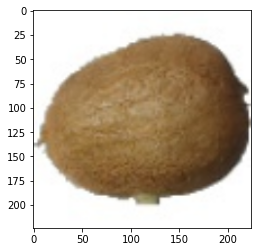

In [ ]:
idx = np.random.randint(0, images.shape[0], 1)[0]
print(idx)

plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))

## Zero Centering

In [ ]:
# images, labels -> x_train, y_train, x_test, y_test로 split

x_train, x_test, y_train, y_test = train_test_split(images, labels)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5174, 224, 224, 3), (1725, 224, 224, 3), (5174,), (1725,))

In [ ]:
# zero-centering
compute_mean = lambda imgs : np.mean(imgs, axis=0)

In [ ]:
# trainset으로 mean_img 계산하고, 
# testset은 trainset mean img로 
mean_img = compute_mean(x_train)
mean_img.shape

(224, 224, 3)

In [ ]:
zero_mean_img = mean_img.astype('int8') # 메모리 문제로 int8로 변환(근사값으로 사용)

In [ ]:
x_train = x_train.astype('int8') 
x_test = x_test.astype('int8') 

In [ ]:
x_train -= zero_mean_img

In [ ]:
x_test -= zero_mean_img

In [ ]:
x_train.shape, x_test.shape

((5174, 224, 224, 3), (1725, 224, 224, 3))

In [ ]:
y_train.shape, y_test.shape

((5174,), (1725,))

## 데이터 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/MyDrive/LectureSpace/OpenDataset/pre_natural_imgs/' # 각자 원하는 드라이브 경로에 맞게 수정합시다.

In [ ]:
with open(folder_path+'x_train.pickle', 'wb') as f:
    pickle.dump(x_train, f)

In [ ]:
with open(folder_path+'y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f)

In [ ]:
with open(folder_path+'x_test.pickle', 'wb') as f:
    pickle.dump(x_test, f)

In [ ]:
with open(folder_path+'y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

## 데이터 다운로드(gdown)

`!gdown`
* 구글 드라이브에서 파일을 다운로드하는 명령어이다.



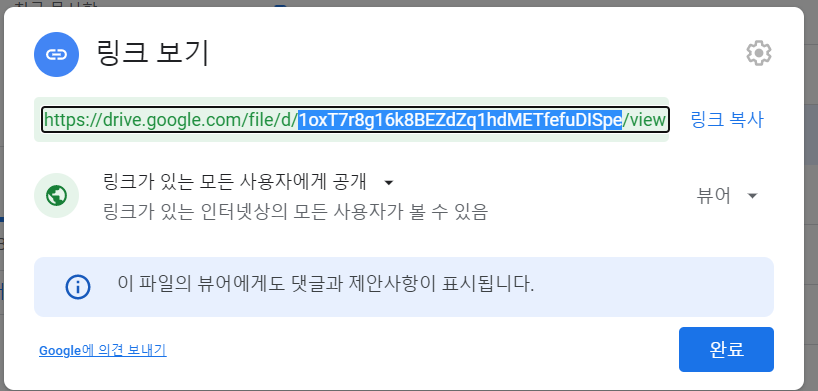

* gdown 뒤에 파일 아이디를 입력한다.
* 파일아이디는 파일 링크에서 d와 view 사이에 있는 문자에 해당한다.

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
# x_train
!gdown 1uKn5KmcXMv4QUaIPz7wcc-my1mY1qrkk

# y_train
!gdown 11vtzegsqPhaLUMUhvkZ9lUNWDvcPWSVS

# x_test
!gdown 18KIm5cGTY1-Z-668dQx6simAKyzfMSnk

# y_test
!gdown 1MrQDy-Z6aPbDetbW0l_Kwcq48xd2A45k

Downloading...
From: https://drive.google.com/uc?id=1uKn5KmcXMv4QUaIPz7wcc-my1mY1qrkk
To: /content/x_train.pickle
100% 779M/779M [00:17<00:00, 44.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=11vtzegsqPhaLUMUhvkZ9lUNWDvcPWSVS
To: /content/y_train.pickle
100% 41.5k/41.5k [00:00<00:00, 31.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=18KIm5cGTY1-Z-668dQx6simAKyzfMSnk
To: /content/x_test.pickle
100% 260M/260M [00:06<00:00, 38.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MrQDy-Z6aPbDetbW0l_Kwcq48xd2A45k
To: /content/y_test.pickle
100% 14.0k/14.0k [00:00<00:00, 22.7MB/s]


In [ ]:
with open('x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)

with open('y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)

with open('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [ ]:
x_train.shape, y_train.shape

((5174, 224, 224, 3), (5174,))

In [ ]:
x_test.shape, y_test.shape

((1725, 224, 224, 3), (1725,))